In [7]:
import pandas as pd
url = "C:/Users/PROPIETARIO.ACER/Downloads/covid.csv"
data = pd.read_csv(url,engine='python', index_col=0)
data

,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,TIPO PACIENTE,EDAD
0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,51
1,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,37
2,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,18
3,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,40
4,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,HOSPITALIZADO,78
...,...,...,...,...,...,...,...,...,...,...,...
827945,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,9
827946,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,35
827948,HOMBRE,SI,NO,NO,NO,NO,NO,NO,SI,AMBULATORIO,57
827949,MUJER,NO,NO,NO,NO,NO,NO,NO,SI,AMBULATORIO,71


In [8]:
#hacemos variables dummies a todas las variables categoricas
sexo_dummy=pd.get_dummies(data["SEXO"], prefix="SEXO")
obesidad_dummy=pd.get_dummies(data["OBESIDAD"], prefix="OBESIDAD")
diabetes_dummy=pd.get_dummies(data["DIABETES"], prefix="DIABETES")
epoc_dummy=pd.get_dummies(data["EPOC"], prefix="EPOC")
asma_dummy=pd.get_dummies(data["ASMA"], prefix="ASMA")
cardiovascular_dummy=pd.get_dummies(data["CARDIOVASCULAR"], prefix="CARDIOVASCULAR")
renalcro_dummy=pd.get_dummies(data["RENAL CRONICA"], prefix="RENAL CRONICA")
inmunosupresion_dummy=pd.get_dummies(data["INMUNOSUPRESION"], prefix="INMUNOSUPRESION")
hipertension_dummy=pd.get_dummies(data["HIPERTENSION"], prefix="HIPERTENSION")
tipopaciente_dummy=pd.get_dummies(data["TIPO PACIENTE"], prefix="TIPO PACIENTE")

In [9]:
data=pd.concat([data,sexo_dummy ], axis=1)
data=pd.concat([data,obesidad_dummy], axis=1)
data=pd.concat([data,diabetes_dummy], axis=1)
data=pd.concat([data,epoc_dummy], axis=1)
data=pd.concat([data,asma_dummy], axis=1)
data=pd.concat([data,cardiovascular_dummy], axis=1)
data=pd.concat([data,renalcro_dummy], axis=1)
data=pd.concat([data,inmunosupresion_dummy], axis=1)
data=pd.concat([data,hipertension_dummy], axis=1)
data=pd.concat([data,tipopaciente_dummy], axis=1)

In [10]:
data_dummies=data.drop(data.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347502 entries, 0 to 827950
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   EDAD                         347502 non-null  int64
 1   SEXO_HOMBRE                  347502 non-null  uint8
 2   SEXO_MUJER                   347502 non-null  uint8
 3   OBESIDAD_NO                  347502 non-null  uint8
 4   OBESIDAD_SI                  347502 non-null  uint8
 5   DIABETES_NO                  347502 non-null  uint8
 6   DIABETES_SI                  347502 non-null  uint8
 7   EPOC_NO                      347502 non-null  uint8
 8   EPOC_SI                      347502 non-null  uint8
 9   ASMA_NO                      347502 non-null  uint8
 10  ASMA_SI                      347502 non-null  uint8
 11  CARDIOVASCULAR_NO            347502 non-null  uint8
 12  CARDIOVASCULAR_SI            347502 non-null  uint8
 13  RENAL CRONICA_NO             

In [29]:
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
from   sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pylab as mp
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
from   IPython.display           import display
import matplotlib.pylab          as     plt 
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Variable target 
Y=pd.Categorical(data['TIPO PACIENTE']).codes
X=data_dummies.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
X

,EDAD,SEXO_HOMBRE,SEXO_MUJER,OBESIDAD_NO,OBESIDAD_SI,DIABETES_NO,DIABETES_SI,EPOC_NO,EPOC_SI,ASMA_NO,ASMA_SI,CARDIOVASCULAR_NO,CARDIOVASCULAR_SI,RENAL CRONICA_NO,RENAL CRONICA_SI,INMUNOSUPRESION_NO,INMUNOSUPRESION_SI,HIPERTENSION_NO,HIPERTENSION_SI
0,51,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,37,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,18,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,40,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,78,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827945,9,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
827946,35,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
827948,57,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1
827949,71,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1


In [16]:
model=LogisticRegression(C=100,solver='newton-cg',max_iter=10000).fit(X,Y)
print(model.coef_[0])
print(model.intercept_)

[ 0.05227572  0.25008189 -0.25007805 -0.13860114  0.13860524 -0.33570565
  0.33570962 -0.15208224  0.15208643  0.08216332 -0.08215913 -0.0454562
  0.04546039 -0.48450138  0.48450556 -0.41438007  0.41438426 -0.11835011
  0.11835405]
[-2.16027647]


In [20]:
X0 = add_constant(X)
model0 = Logit(Y,X0)
modelfit=model0.fit()
modelfit.summary()

         Current function value: 0.494172
         Iterations: 35


C:\Users\PROPIETARIO.ACER\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\PROPIETARIO.ACER\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\PROPIETARIO.ACER\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               347502
Model:                          Logit   Df Residuals:                   347491
Method:                           MLE   Df Model:                           10
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.1709
Time:                        09:52:10   Log-Likelihood:            -1.7173e+05
converged:                      False   LL-Null:                   -2.0713e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -30.4602        nan        nan        nan         nan         nan
EDAD                   0.0523      0.000    170.243      0.000       0.052       0.053
SEXO_HOMBRE            9.1875   5.52e+04      0.000      1.000   -1.08e+05    1.08e+05
SEXO_MUJER             8.6874   5.52e+04      0.000      1.000   -1.08e+05    1.08e+05
OBESIDAD_NO           20.9565    3.1e+04      0.001      0.999   -6.08e+04    6.08e+04
OBESIDAD_SI           21.2337   3.05e+04      0.001      0.999   -5.98e+04    5.98e+04
DIABETES_NO            9.8772        nan        nan        nan         nan         nan
DIABETES_SI           10.5486        nan        nan        nan         nan         nan
EPOC_NO               -3.8259        nan        nan        nan         nan         nan
EPOC_SI               -3.5218        nan        nan        nan         nan         nan
ASMA_NO                5.9081        nan        nan        nan         nan         nan
ASMA_SI                5.7438        nan        nan        nan         nan         nan
CARDIOVASCULAR_NO    -12.7069    3.4e+04     -0.000      1.000   -6.67e+04    6.67e+04
CARDIOVASCULAR_SI    -12.6160    3.4e+04     -0.000      1.000   -6.67e+04    6.67e+04
RENAL CRONICA_NO      -0.0466        nan        nan        nan         nan         nan
RENAL CRONICA_SI       0.9224        nan        nan        nan         nan         nan
INMUNOSUPRESION_NO    -2.0920        nan        nan        nan         nan         nan
INMUNOSUPRESION_SI    -1.2632        nan        nan        nan         nan         nan
HIPERTENSION_NO       -0.3147        nan        nan        nan         nan         nan
HIPERTENSION_SI       -0.0780        nan        nan        nan         nan         nan
======================================================================================
"""

In [21]:

#Modelo construido con datos de entrenamiendo 80% de la muestra
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
yp0=model.predict(X_test)
accuracy_score(y_test, yp0, normalize=True)

0.7673846419475979

In [35]:
from   sklearn.neighbors         import NearestNeighbors
from   sklearn.neighbors         import KNeighborsClassifier
from   sklearn.model_selection   import GridSearchCV
from   sklearn.preprocessing     import LabelEncoder
from   sklearn.feature_selection import SelectKBest, f_classif
from   IPython.display           import display
import matplotlib.pylab          as     plt 
import warnings
warnings.filterwarnings('ignore')

In [25]:
fselect = SelectKBest(f_classif, k='all')
scores_fit = fselect.fit(X, Y)
features_score = scores_fit.scores_.round(3)

In [26]:
#imprimimos el valor de los scores 
features_score

array([65598.259,  3722.982,  3722.982,  1733.799,  1733.799, 25650.564,
       25650.564,  3168.239,  3168.239,   105.734,   105.734,  2563.401,
        2563.401,  5356.515,  5356.515,  1500.287,  1500.287, 21641.632,
       21641.632])

In [27]:
features= list(X.columns.values)
selected_features = fselect.get_support([scores_fit])
feat_list = [ ]
for i in selected_features:
    feat_list.append({'Feature':features[i], 'Score': features_score[i]  })
features_select = pd.DataFrame(feat_list)
features_select

,Feature,Score
0,EDAD,65598.259
1,SEXO_HOMBRE,3722.982
2,SEXO_MUJER,3722.982
3,OBESIDAD_NO,1733.799
4,OBESIDAD_SI,1733.799
5,DIABETES_NO,25650.564
6,DIABETES_SI,25650.564
7,EPOC_NO,3168.239
8,EPOC_SI,3168.239
9,ASMA_NO,105.734


In [40]:
#funcion para eliminar features
def drop_feature(df,feature):
    X=df
    for i in feature:
        X=X.drop(i,1)
    return X

Podemos notar que las covariables que podemos quitar son ASMA y INMUNOSUPRESION, y las que mas aportan al modelo son la EDAD y DIABETES 

In [52]:
#eliminamos las variables antes mencionadas
droplist=["ASMA_NO","ASMA_SI","INMUNOSUPRESION_NO","INMUNOSUPRESION_SI","OBESIDAD_NO","OBESIDAD_SI"]
X_train=drop_feature(X_train,droplist)
X_test=drop_feature(X_test,droplist)

In [53]:
X_train.head(2)

,EDAD,SEXO_HOMBRE,SEXO_MUJER,DIABETES_NO,DIABETES_SI,EPOC_NO,EPOC_SI,CARDIOVASCULAR_NO,CARDIOVASCULAR_SI,RENAL CRONICA_NO,RENAL CRONICA_SI,HIPERTENSION_NO,HIPERTENSION_SI
215593,54,0,1,1,0,1,0,1,0,1,0,0,1
361968,43,1,0,1,0,1,0,1,0,1,0,1,0


In [54]:
k_range = list(range(1,12))
score   = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test, y_test))

Text(0.5, 1.0, 'Valores de k vs exactitud')

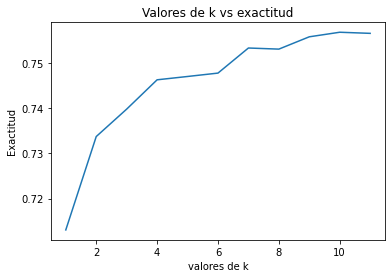

In [55]:
plt.plot(k_range,score)
plt.xlabel("valores de k")
plt.ylabel("Exactitud")
plt.title("Valores de k vs exactitud")

In [ ]:
k_range = list(range(1,12))
pesos = ['uniform','distance']
hiperparam = dict(n_neighbors=k_range, weights = pesos)
model = GridSearchCV(knn, hiperparam, cv=10, scoring = 'accuracy')
model.fit(X_train, y_train)
print("model score: %.3f" % model.score(X_test, y_test))